In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

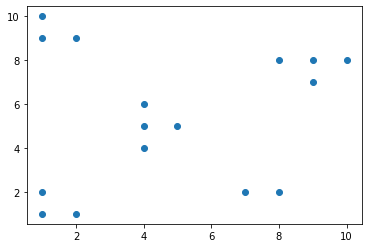

In [61]:
X=np.array([[ 4, 9, 8, 7, 1, 1, 1, 2, 1, 5, 4, 10, 9, 8, 2, 4],[5, 8, 8, 2, 9, 10, 1, 1, 2, 5, 6, 8, 7, 2, 9, 4]])
plt.scatter(X[0,:],X[1,:]); plt.show()

In [62]:
## neighborhood kernel:
K_nearest=0.8
K_other=0.1
## initial guess for representative point locations:
Xref = np.zeros((2,5))
i = 5
for j in range(0,5):
    Xref[:,j] = X[:,i] + np.array([1,-1])
    i = i+1
eta=0.1
N_grid = 5

In [63]:
## Point 1 iteration 1
## find which reference point is nearest to current data point: 
I=np.argmin(np.array([np.linalg.norm(X[:,0]-Xref[:,0])
                             ,np.linalg.norm(X[:,0]-Xref[:,1])
                             ,np.linalg.norm(X[:,0]-Xref[:,2])
                             ,np.linalg.norm(X[:,0]-Xref[:,3])
                             ,np.linalg.norm(X[:,0]-Xref[:,4])]))
## adjust the nearest reference point using the learning rate:
Xref[:,I]=Xref[:,I]+eta*K_nearest*(X[:,0]-Xref[:,I])
## adjust the other reference points using the specified kernel:
nearest_neighbors_grid_space=np.zeros(2,dtype=int)
nearest_neighbors_grid_space[:]=[I-1,I+1]
nearest_neighbors_grid_space[nearest_neighbors_grid_space==-1]=N_grid-1
nearest_neighbors_grid_space[nearest_neighbors_grid_space==N_grid]=0
i1=0
for nn in nearest_neighbors_grid_space:
    i1=i1+1
    Xref[:,nn]=Xref[:,nn]+eta*K_other*(X[:,0]-Xref[:,nn])
print("The closest representative point to the 1st point in the dataset is:"); print(I+1)
print("Adjusted nearest Representative point and the neibhoring representative points are:") ; print(Xref)

The closest representative point to the 1st point in the dataset is:
5
Adjusted nearest Representative point and the neibhoring representative points are:
[[2.02 2.   3.   2.02 5.84]
 [8.96 0.   0.   1.04 4.08]]


In [64]:
## Point 2 iteration 2
## find which reference point is nearest to current data point: 
I=np.argmin(np.array([np.linalg.norm(X[:,1]-Xref[:,0])
                             ,np.linalg.norm(X[:,1]-Xref[:,1])
                             ,np.linalg.norm(X[:,1]-Xref[:,2])
                             ,np.linalg.norm(X[:,1]-Xref[:,3])
                             ,np.linalg.norm(X[:,1]-Xref[:,4])]))
## adjust the nearest reference point using the learning rate:
Xref[:,I]=Xref[:,I]+eta*K_nearest*(X[:,1]-Xref[:,I])
## adjust the other reference points using the specified kernel:
nearest_neighbors_grid_space=np.zeros(2,dtype=int)
nearest_neighbors_grid_space[:]=[I-1,I+1]
nearest_neighbors_grid_space[nearest_neighbors_grid_space==-1]=N_grid-1
nearest_neighbors_grid_space[nearest_neighbors_grid_space==N_grid]=0
i1=0
for nn in nearest_neighbors_grid_space:
    i1=i1+1
    Xref[:,nn]=Xref[:,nn]+eta*K_other*(X[:,1]-Xref[:,nn])
print("The closest representative point to the 2nd point in the dataset is:"); print(I+1)
print("Adjusted nearest Representative point and the neibhoring representative points are:") ; print(Xref)

The closest representative point to the 2nd point in the dataset is:
5
Adjusted nearest Representative point and the neibhoring representative points are:
[[2.0898 2.     3.     2.0898 6.0928]
 [8.9504 0.     0.     1.1096 4.3936]]


Representative Points after 1 epoch
[[2.26478756 1.980299   2.950498   2.27903189 6.26442825]
 [8.77285213 0.277209   0.039701   1.46490202 4.79694251]]


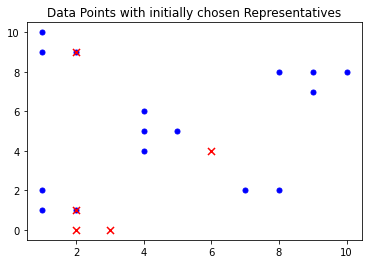

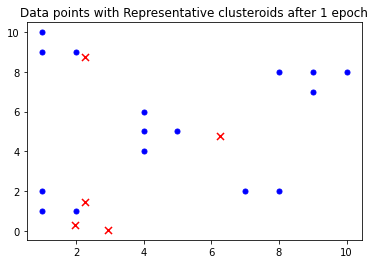

In [88]:
eta = 0.1
Xref = np.zeros((2,5))
i = 5
for j in range(0,5):
    Xref[:,j] = X[:,i] + np.array([1,-1])
    i = i+1

plt.figure(1); plt.clf()
plt.scatter(X[0,:],X[1,:],s=25,marker='o',c='b')
plt.title("Data Points with initially chosen Representatives")
# plot reference points:
href=plt.scatter(Xref[0,:],Xref[1,:],s=50,marker='x',c='r')
for n in range(0, np.size(X[0,:])):
    I=np.argmin(np.array([np.linalg.norm(X[:,n]-Xref[:,0])
                             ,np.linalg.norm(X[:,n]-Xref[:,1])
                             ,np.linalg.norm(X[:,n]-Xref[:,2])
                             ,np.linalg.norm(X[:,n]-Xref[:,3])
                             ,np.linalg.norm(X[:,n]-Xref[:,4])]))
    ## adjust the nearest reference point using the learning rate:
    Xref[:,I]=Xref[:,I]+eta*K_nearest*(X[:,n]-Xref[:,I])
    ## adjust the other reference points using the specified kernel:
    nearest_neighbors_grid_space=np.zeros(2,dtype=int)
    nearest_neighbors_grid_space[:]=[I-1,I+1]
    nearest_neighbors_grid_space[nearest_neighbors_grid_space==-1]=N_grid-1
    nearest_neighbors_grid_space[nearest_neighbors_grid_space==N_grid]=0
    i1=0
    for nn in nearest_neighbors_grid_space:
        i1=i1+1
        Xref[:,nn]=Xref[:,nn]+eta*K_other*(X[:,n]-Xref[:,nn])
plt.figure(2); plt.clf()
plt.scatter(X[0,:],X[1,:],s=25,marker='o',c='b')
plt.title("Data points with Representative clusteroids after 1 epoch")
# plot reference points:
href=plt.scatter(Xref[0,:],Xref[1,:],s=50,marker='x',c='r')
print("Representative Points after 1 epoch");print(Xref)

In [89]:
import numpy as np
from numpy import linalg
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial.distance import pdist,squareform
from sklearn.cluster import KMeans

L first 5 :
[[ 3.80143981e+00 -8.58864775e-01 -2.10840499e-03 -4.02507220e-03
  -8.64942251e-06]
 [-8.58864775e-01  3.94572147e+00 -7.12124140e-03 -1.35948790e-02
  -1.06470198e-04]
 [-2.10840499e-03 -7.12124140e-03  3.85848712e+00 -9.62678334e-01
  -4.10235345e-03]
 [-4.02507220e-03 -1.35948790e-02 -9.62678334e-01  4.04793909e+00
  -7.53935011e-03]
 [-8.64942251e-06 -1.06470198e-04 -4.10235345e-03 -7.53935011e-03
   3.83417690e+00]]
D first 5:
[[4.80143981 0.         0.         0.         0.        ]
 [0.         4.94572147 0.         0.         0.        ]
 [0.         0.         4.85848712 0.         0.        ]
 [0.         0.         0.         5.04793909 0.        ]
 [0.         0.         0.         0.         4.8341769 ]]
W first 5:
[[1.00000000e+00 8.58864775e-01 2.10840499e-03 4.02507220e-03
  8.64942251e-06]
 [8.58864775e-01 1.00000000e+00 7.12124140e-03 1.35948790e-02
  1.06470198e-04]
 [2.10840499e-03 7.12124140e-03 1.00000000e+00 9.62678334e-01
  4.10235345e-03]
 [4.02507

/Users/ssama/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/ssama/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


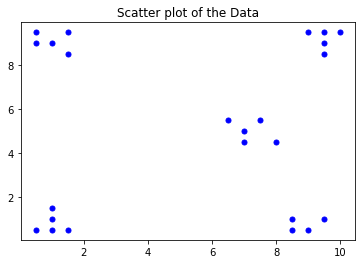

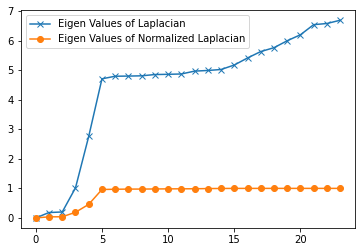

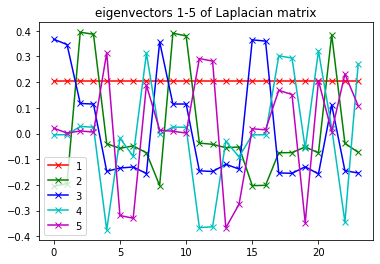

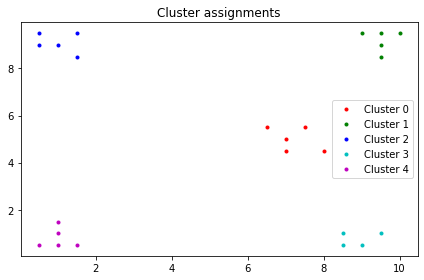

In [149]:
X1=np.array([[0.5,1.5,0.5,1,9,7.5,7,9.5,1.5,1,1,8.5,9.5,6.5,8,0.5,1,9,9.5,7,10,1.5,8.5,9.5],
[9.5,8.5,0.5,1,0.5,5.5,4.5,9.5,9.5,0.5,1.5,0.5,1,5.5,4.5,9,9,9.5,9,5,9.5,0.5,1,8.5]])

color = 'rgbcmyrgbcmyrgbcmyrgbcmy'
marker = '......xxxxxx++++++oooooo'
plt.figure(1);plt.clf()
plt.scatter(X1[0,:],X1[1,:],s=25,marker='o',c='b')
plt.title("Scatter plot of the Data")


distances = squareform(pdist(X1.T, "euclid"))
dist_std = np.std(distances)
W=np.exp(-distances**2/dist_std**2)
D = np.diag(sum(W))
L = D - W
print("L first 5 :");print(L[0:5, 0:5])
print("D first 5:"); print(D[0:5, 0:5])
print("W first 5:"); print(W[0:5, 0:5])
L_nmlz = np.linalg.inv(D) @ L
print("L Normalized first 5 :");print(L_nmlz[0:5, 0:5])
evals, evecs = scipy.linalg.eig(L)
idx_0 = evals.argsort()
evals = evals[idx_0]
d_0 = np.diag(evals)
evecs = evecs[:,idx_0]
evals_n, evecs_n = scipy.linalg.eig(L_nmlz)
idx_1 = evals_n.argsort()
evals_n = evals_n[idx_1]
evecs_n = evecs_n[:,idx_1]
d_1 = np.diag(evals_n)


plt.figure(2); plt.clf()
plt.plot(evals,'-x', label = "Eigen Values of Laplacian")
plt.plot(evals_n, "-o", label = "Eigen Values of Normalized Laplacian")
plt.legend()

print("Based on the eigenvalues, lambda1, ..., lambda6 << lambda7,... So, the appropriate number of Clusters are 6-1 = 5 ")

evecs_nn = evecs_n[:, 0:5]
plt.figure(3); plt.clf()
for ii in range(0,5):
        hl=plt.plot(evecs_nn[:,ii],color[ii]+'x-')

plt.title('eigenvectors 1-5 of Laplacian matrix')
plt.legend(['1','2','3','4', '5'])

kmeans = KMeans(n_clusters=5,n_init=5,copy_x=True).fit(evecs_nn)
idx=kmeans.labels_
C=kmeans.cluster_centers_

print("Cluster Assignments based on K means:"); print(idx)
print("Cluster centers from K means of the Eigen Vector matrix: "); print(C)
## draw calculated clusters:
plt.figure(4); plt.clf()
for i in range(0,5):
    X_0=[X1[0, ii] for ii in range(0,24) if idx[ii]==i]
    X_1=[X1[1, ii] for ii in range(0,24) if idx[ii]==i]
    plt.plot(X_0,X_1,color[i]+marker[i])

# write legend:
legends=[]
for i in range(0,5):
    if i<10:
        legends.append('Cluster '+str(i))
    else:
        legends.append('Cluster'+str(i))

plt.legend(legends)
plt.title('Cluster assignments')
plt.tight_layout()
plt.pause(0.05)



In [2]:
from scipy.io import loadmat

cure = loadmat("/Users/ssama/Downloads/HW08_CURE.mat")
sorted(cure.keys())
cure = np.array(cure['X'])

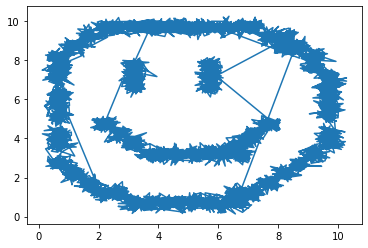

In [156]:
plt.plot(cure[0,:], cure[1,:])

In [160]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist,squareform

cure_y=pdist(cure.T,'euclid'); distances=squareform(cure_y)
Z=linkage(cure.T,method='single')
k=4; idx=fcluster(Z,k,'maxclust')


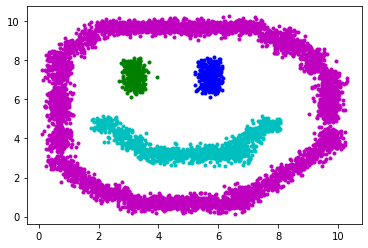

In [172]:
plt.figure(5); plt.clf()
for i in range(1,5):
    X_0=[cure[0, ii] for ii in range(0,7200) if idx[ii]==i]
    X_1=[cure[1, ii] for ii in range(0,7200) if idx[ii]==i]
    plt.plot(X_0,X_1,color[i]+marker[i])

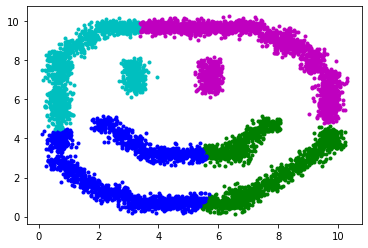

In [174]:
Z1 = linkage(cure.T,method='centroid')
k=4; idx_1=fcluster(Z1,k,'maxclust')

plt.figure(6); plt.clf()
for i in range(1,5):
    X_0=[cure[0, ii] for ii in range(0,7200) if idx_1[ii]==i]
    X_1=[cure[1, ii] for ii in range(0,7200) if idx_1[ii]==i]
    plt.plot(X_0,X_1,color[i]+marker[i])